# 출처
https://www.tensorflow.org/tutorials/keras/classification

# 모듈 불러오기

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


# Fashion MNIST 데이터 로드

In [87]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 클래스 이름 선언

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 데이터 탐색

In [7]:
trim = train_images.shape
print( trim[0], '개의 이미지 파일')
print('크기(width, height):', trim[1], 'x', trim[2])

60000 개의 이미지 파일
크기(width, height): 28 x 28


In [9]:
train_labels # 0~9 사이의 정수들 집합

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# 데이터 전처리

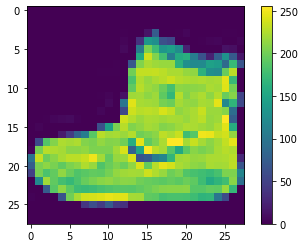

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
# 0~255 사이 범위를 0~1 사이로 조절
train_images = train_images / 255.0
test_images = test_images / 255.0

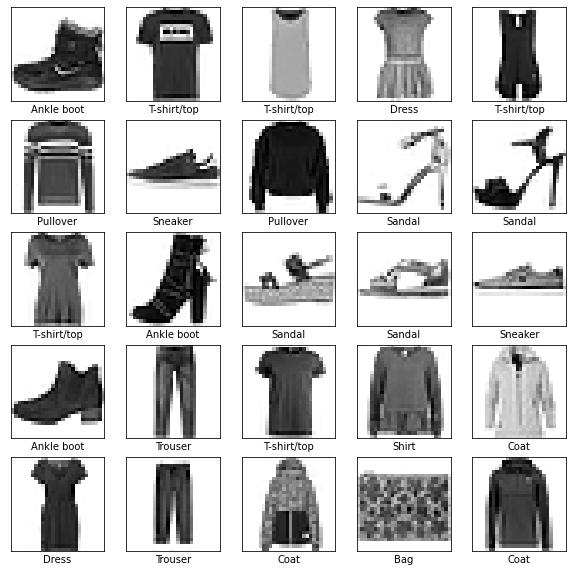

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 모델 구성

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # 행과 열로 이루어진 2차원 배열을 1차원 배열로 변환
    tf.keras.layers.Dense(128, activation='relu'), # 히든 레이어
    tf.keras.layers.Dense(10) # 히든 레이어
])

# 모델 컴파일

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 옵티마이저: 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식
# 손실 함수: 훈련 중 모델이 얼마나 정확한지 측정합니다. 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화해야 합니다.
# 메트릭: 훈련 및 테스트 단계를 모니터링하는 데 사용됩니다. 다음 예에서는 올바르게 분류된 이미지의 정확도를 사용합니다. 

# 모델 훈련

In [32]:
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8795 - accuracy: 0.6709
Epoch 2/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8788 - accuracy: 0.6706
Epoch 3/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8782 - accuracy: 0.6699
Epoch 4/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8776 - accuracy: 0.6711
Epoch 5/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8767 - accuracy: 0.6714
Epoch 6/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8761 - accuracy: 0.6716
Epoch 7/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8755 - accuracy: 0.6726
Epoch 8/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8747 - accuracy: 0.6714
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8741 - accuracy: 0.6716
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.873

# 정확도 평가

In [33]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.8686 - accuracy: 0.6725 - 409ms/epoch - 1ms/step

Test accuracy: 0.6725000143051147


# 예측하기

In [128]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [129]:
predictions = probability_model.predict(test_images)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [130]:
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [131]:
np.argmax(predictions[0])

9

# 예측 확인

In [132]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

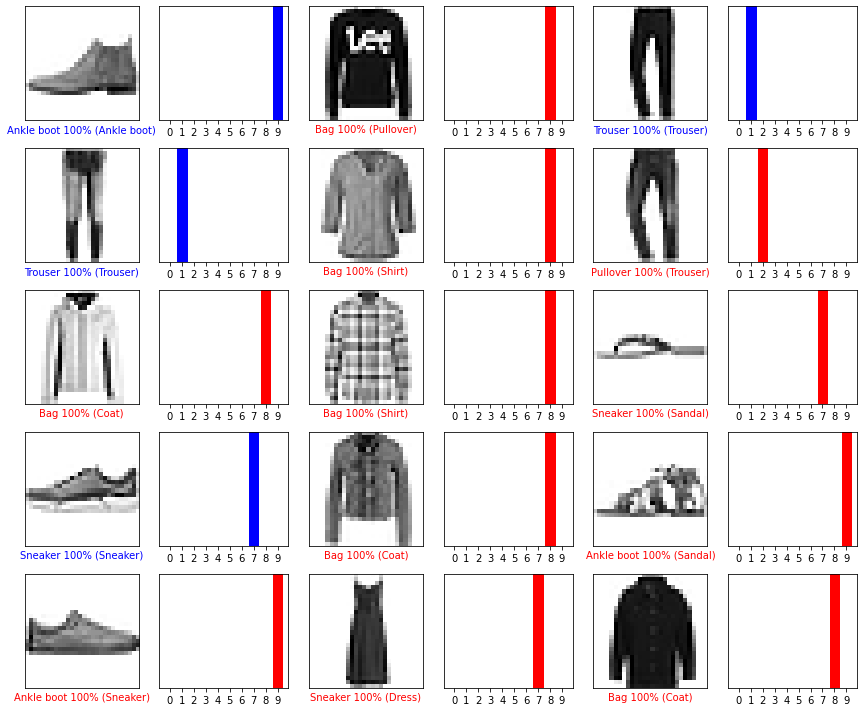

In [135]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()